In [1]:
import numpy as np

from awrams.utils import extents
from awrams.utils import datetools as dt

from matplotlib import pyplot as plt
# %matplotlib inline   ### uncomment to display figures

from awrams.utils.nodegraph import nodes

In [2]:
from awrams.simulation.ondemand import OnDemandSimulator
from awrams.models import awral

In [3]:
def change_path_to_forcing(imap):
    from awrams.utils.nodegraph import nodes
    from os.path import join,dirname
    from os import getcwd

    data_path = '../../test_data/simulation/'

    FORCING = {
        'tmin': ('temp_min*','temp_min_day',data_path),
        'tmax': ('temp_max*','temp_max_day',data_path),
        'precip': ('rain_day*','rain_day',data_path),
        'solar': ('solar*','solar_exposure_day',data_path)
    }
    for k,v in FORCING.items():
        imap.mapping[k+'_f'] = nodes.forcing_from_ncfiles(v[2],v[0],v[1])


In [4]:
input_map = awral.get_default_mapping()
change_path_to_forcing(input_map)

In [5]:
runner = OnDemandSimulator(awral,input_map.mapping)

In [6]:
period = dt.dates('dec 2010 - jan 2011')
extent = extents.from_boundary_offset(400,50,450,100)
r = runner.run(period,extent)

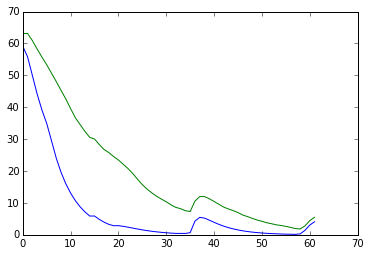

In [7]:
plt.plot(r['ss_sr'][:,0])
plt.plot(r['ss_dr'][:,0])

In [8]:
r.keys()

dict_keys(['s0_sr', 'mleaf_dr', 'sd_sr', 'sd', 'sr', 'sd_dr', 'dd', 'ss', 'sg', 's0', 'final_states', 'mleaf_sr', 'qtot', 'etot', 's0_dr', 'e0', 'ss_sr', 'ss_dr'])

In [9]:
awral.OUTPUTS

{'OUTPUTS_AVG': ['e0', 'etot', 'dd', 's0', 'ss', 'sd'],
 'OUTPUTS_CELL': ['qtot', 'sr', 'sg'],
 'OUTPUTS_HRU': ['s0', 'ss', 'sd', 'mleaf']}

In [10]:
awral.OUTPUTS['OUTPUTS_AVG'] += ['mleaf']

In [11]:
runner = OnDemandSimulator(awral,input_map.mapping)

In [12]:
period = dt.dates('dec 2010 - jan 2011')
extent = extents.from_boundary_offset(400,50,450,100)
r, ires = runner.run(period,extent,True)

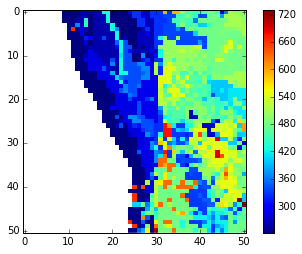

In [13]:
im = plt.imshow(nodes.get_expanded(r['sd'][0],extent.mask),interpolation='None')
plt.colorbar(im)

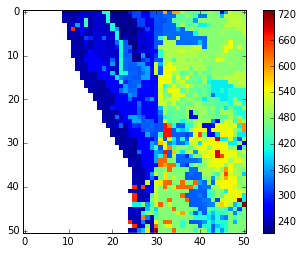

In [14]:
im = plt.imshow(nodes.get_expanded(r['sd'][10],extent.mask),interpolation='None')
plt.colorbar(im)

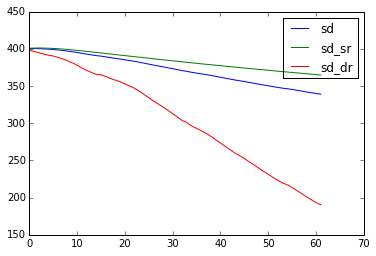

In [15]:
for v in ['sd','sd_sr','sd_dr']:
    plt.plot(r[v].mean(axis=1),label=v)
plt.legend()

In [16]:
period = dt.dates('jan 1 2011')
extent = extents.default()#extents.from_boundary_offset(200,200,300,300)
r, ires = runner.run(period,extent,True)

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.,8.]

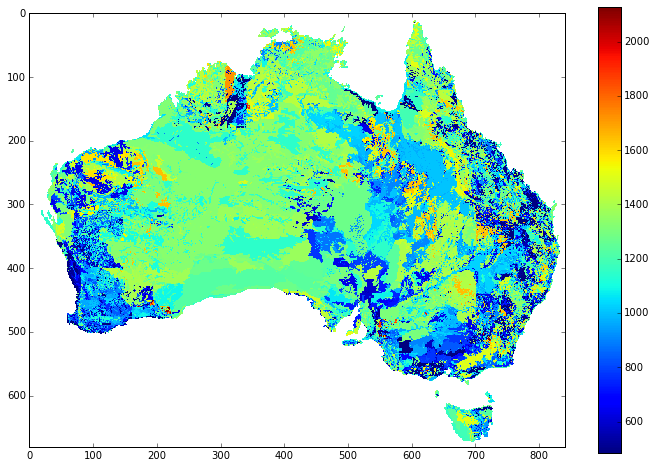

In [18]:
im = plt.imshow(nodes.get_expanded(ires['sdmax'],extent.mask),interpolation='None')
plt.colorbar(im)

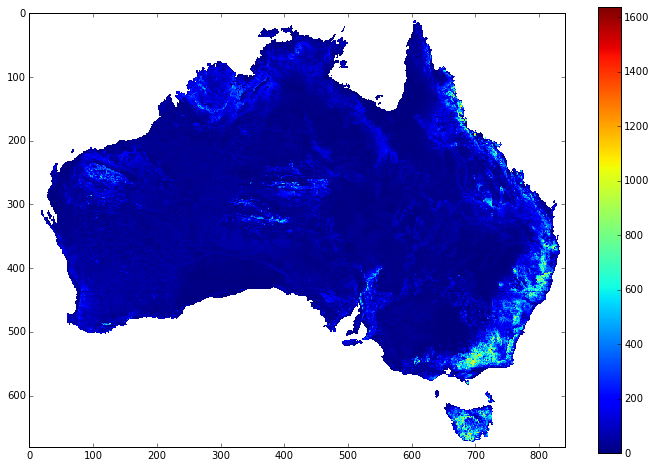

In [19]:
im = plt.imshow(nodes.get_expanded(ires['height'][-1]-ires['height'][0],extent.mask),interpolation='None')
plt.colorbar(im)

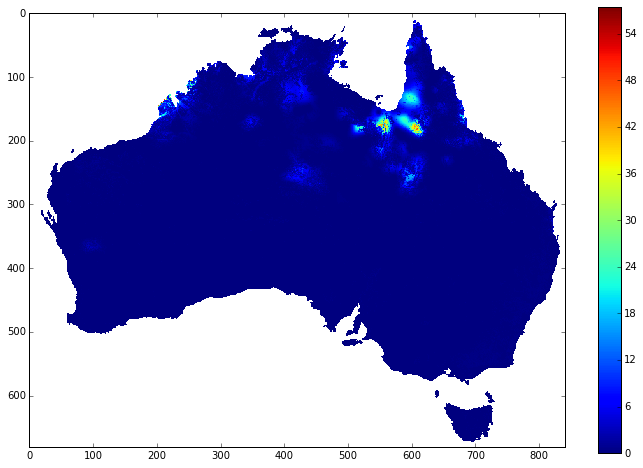

In [20]:
im = plt.imshow(nodes.get_expanded(r['qtot'][0],extent.mask),interpolation='None')
plt.colorbar(im)

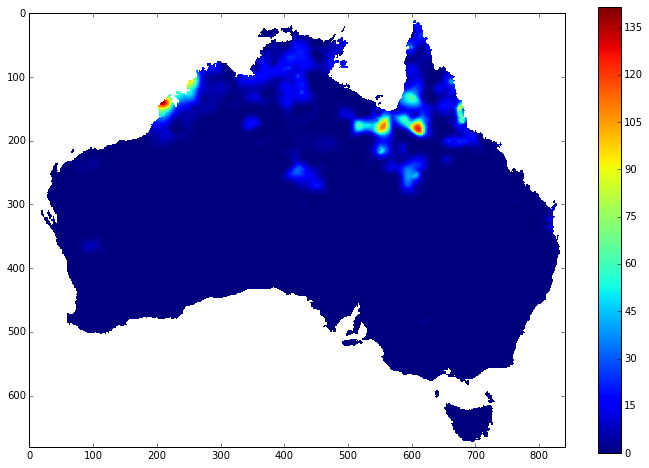

In [21]:
im = plt.imshow(nodes.get_expanded(ires['pt'][0],extent.mask),interpolation='None')
plt.colorbar(im)

In [22]:
input_map.mapping.pt = nodes.const(100.0)

In [23]:
runner = OnDemandSimulator(awral,input_map.mapping)

In [24]:
fixedpt = runner.run(period,extent)

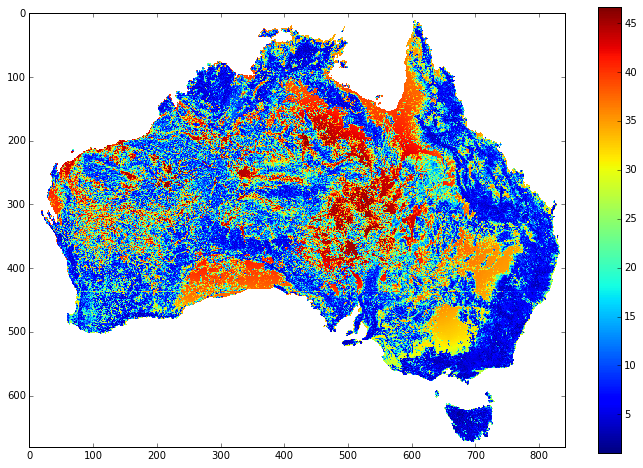

In [25]:
im = plt.imshow(nodes.get_expanded(fixedpt['qtot'][0],extent.mask),interpolation='None')
plt.colorbar(im)